In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Kartik\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from pandas import datetime

def parser(time):
    return datetime.strptime(time, '%Y-%m-%d')

C:\Users\Kartik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [3]:
train_data=pd.read_csv("C:/Users/New folder/Desktop/RETAIL/train_data.csv",parse_dates=[2], 
                                                                  index_col=2,
                                                             date_parser=parser)

C:\Users\Kartik\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_data.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-06-30,1,2,5735,568,1,1,0,0
2015-06-30,2,2,9863,877,1,1,0,0
2015-06-30,3,2,13261,1072,1,1,0,1
2015-06-30,4,2,13106,1488,1,1,0,0
2015-06-30,5,2,6635,645,1,1,0,0


In [5]:
data=train_data.groupby('Date').sum()
data.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Date,,,,,,,
2015-06-26,622170,5575,6634687,760594,1115,0,0
2015-06-27,622170,6690,6538314,698346,1115,0,0
2015-06-28,622170,7805,262669,44422,32,0,0
2015-06-29,622170,1115,11916672,1049017,1115,1115,286
2015-06-30,622170,2230,11483932,1028931,1115,1115,286


###  selecting the sales column

In [6]:
df2 = data.reset_index()['Sales']
df2

0         97235
1       6949829
2       6347820
3       6638954
4       5951593
         ...   
906     6634687
907     6538314
908      262669
909    11916672
910    11483932
Name: Sales, Length: 911, dtype: int64

In [7]:
df2.shape

(911,)

In [8]:
df2.shape

(911,)

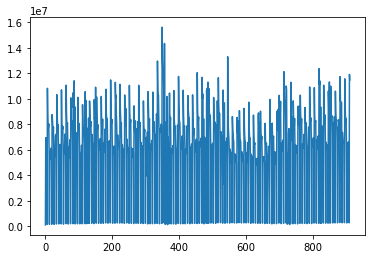

In [9]:
import matplotlib.pyplot as plt
plt.plot(df2)

### Applying min_max sacler

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [11]:
df2

array([[0.        ],
       [0.44135359],
       [0.40258012],
       [0.42133113],
       [0.37706041],
       [0.0030058 ],
       [0.69105994],
       [0.55726057],
       [0.49267125],
       [0.49298568],
       [0.51152331],
       [0.38130469],
       [0.00301533],
       [0.37288653],
       [0.3487857 ],
       [0.33464384],
       [0.34066871],
       [0.38900253],
       [0.38083459],
       [0.00350148],
       [0.55801007],
       [0.52962052],
       [0.49266867],
       [0.47291337],
       [0.49487306],
       [0.37043791],
       [0.00293779],
       [0.37236574],
       [0.34492626],
       [0.37436731],
       [0.44900112],
       [0.45765997],
       [0.43052758],
       [0.00478736],
       [0.65929471],
       [0.56319675],
       [0.51509769],
       [0.47228476],
       [0.50696717],
       [0.39054887],
       [0.0048517 ],
       [0.34907354],
       [0.35206478],
       [0.39145881],
       [0.40737663],
       [0.3966053 ],
       [0.3906212 ],
       [0.004

## Train, Test size is (65,35)

In [12]:
training_size =int(len(df2)*0.65)
training_size

592

In [20]:
test_size = len(df2)-training_size
test_size

319

In [21]:
train_data = df2[0:training_size,:]
train_data
train_data.shape

(592, 1)

In [22]:
test_data = df2[training_size:len(df2),:1]

In [23]:
test_data

array([[0.3171583 ],
       [0.01021318],
       [0.58956212],
       [0.4895698 ],
       [0.44605329],
       [0.41986575],
       [0.42129023],
       [0.31306821],
       [0.0097642 ],
       [0.3641256 ],
       [0.31940172],
       [0.32654649],
       [0.33867513],
       [0.41642359],
       [0.35718815],
       [0.0114418 ],
       [0.62087941],
       [0.49963626],
       [0.45554344],
       [0.43169264],
       [0.43870744],
       [0.31646451],
       [0.00842956],
       [0.35797726],
       [0.33250824],
       [0.32998382],
       [0.33435394],
       [0.34667297],
       [0.32443852],
       [0.00942323],
       [0.55564402],
       [0.45689527],
       [0.41326669],
       [0.40577837],
       [0.41563602],
       [0.31034   ],
       [0.0093433 ],
       [0.33365359],
       [0.31429786],
       [0.30327593],
       [0.3138123 ],
       [0.33642894],
       [0.31418605],
       [0.00794825],
       [0.54430508],
       [0.56655775],
       [0.48982002],
       [0.519

### Preprocessing of data

In [24]:
def create_dataset(data,time_step=1):
    x= []
    y= []
    for i in range(len( data)-time_step-1):
        a = data[i:(i+time_step),0] 
         
        x.append(a)
        y.append(data[i+time_step, 0]) 
    return np.array(x), np.array(y)
            

    

In [25]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

###  There are 100 features in x_train because time_step is 100

In [26]:
print(x_train)

[[0.         0.44135359 0.40258012 ... 0.64525087 0.5359445  0.48959106]
 [0.44135359 0.40258012 0.42133113 ... 0.5359445  0.48959106 0.481968  ]
 [0.40258012 0.42133113 0.37706041 ... 0.48959106 0.481968   0.51262086]
 ...
 [0.00839034 0.68914159 0.57815632 ... 0.31183778 0.0098163  0.37057549]
 [0.68914159 0.57815632 0.53809227 ... 0.0098163  0.37057549 0.33392023]
 [0.57815632 0.53809227 0.53195301 ... 0.37057549 0.33392023 0.3254271 ]]


In [27]:
print(x_train.shape), print(y_train.shape)

(491, 100)
(491,)


(None, None)

In [28]:
len(x_train)

491

In [29]:
print(x_test.shape), print(y_test.shape)

(218, 100)
(218,)


(None, None)

### Reshape x_train in (no of rows , no of columns , 1)

In [30]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [31]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from keras.layers import Activation
from keras.optimizers import Adam 

In [87]:
model2 = Sequential()
model2.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)
model2.compile(loss='mean_squared_error', optimizer='adam')  
#model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)

In [88]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [89]:
model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 100,batch_size = 64,verbose=1)

Train on 491 samples, validate on 218 samples
Epoch 1/100
491/491 [==============================] - 21s 43ms/sample - loss: 0.1066 - val_loss: 0.0794
Epoch 2/100
491/491 [==============================] - 4s 8ms/sample - loss: 0.0529 - val_loss: 0.0626
Epoch 3/100
491/491 [==============================] - 4s 8ms/sample - loss: 0.0498 - val_loss: 0.0465
Epoch 4/100
491/491 [==============================] - 3s 6ms/sample - loss: 0.0443 - val_loss: 0.0464
Epoch 5/100
491/491 [==============================] - 3s 7ms/sample - loss: 0.0424 - val_loss: 0.0477
Epoch 6/100
491/491 [==============================] - 3s 6ms/sample - loss: 0.0424 - val_loss: 0.0464
Epoch 7/100
491/491 [==============================] - 3s 7ms/sample - loss: 0.0420 - val_loss: 0.0467
Epoch 8/100
491/491 [==============================] - 4s 7ms/sample - loss: 0.0420 - val_loss: 0.0465
Epoch 9/100
491/491 [==============================] - 3s 7ms/sample - loss: 0.0419 - val_loss: 0.0463
Epoch 10/100
491/491 [===

491/491 [==============================] - 3s 7ms/sample - loss: 0.0405 - val_loss: 0.0460
Epoch 80/100
491/491 [==============================] - 5s 11ms/sample - loss: 0.0410 - val_loss: 0.0452
Epoch 81/100
491/491 [==============================] - 4s 9ms/sample - loss: 0.0400 - val_loss: 0.0448
Epoch 82/100
491/491 [==============================] - 5s 10ms/sample - loss: 0.0396 - val_loss: 0.0448
Epoch 83/100
491/491 [==============================] - 5s 9ms/sample - loss: 0.0397 - val_loss: 0.0451
Epoch 84/100
491/491 [==============================] - 6s 12ms/sample - loss: 0.0395 - val_loss: 0.0453
Epoch 85/100
491/491 [==============================] - 5s 10ms/sample - loss: 0.0394 - val_loss: 0.0454
Epoch 86/100
491/491 [==============================] - 5s 10ms/sample - loss: 0.0394 - val_loss: 0.0451
Epoch 87/100
491/491 [==============================] - 5s 10ms/sample - loss: 0.0391 - val_loss: 0.0456
Epoch 88/100
491/491 [==============================] - 5s 10ms/sample 

In [148]:
## prediction
train_predict = model2.predict(x_train)

In [149]:
test_predict = model2.predict(x_test)

In [150]:
## transform  back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [151]:
import math
#from sklearn.matrics import mean_squared_error
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6026518.203960839

In [152]:
math.sqrt(mean_squared_error(y_test,test_predict))

6032193.864556651

In [153]:
len(df2)

911

In [154]:
df2.shape

(911, 1)

### plot the predictions

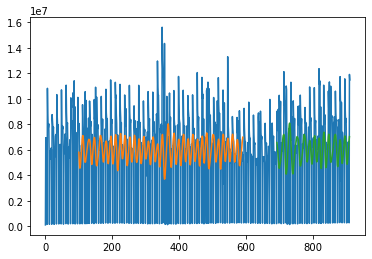

In [95]:
look_back = 100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [96]:
## prdiction for next 30 days

In [97]:
len(test_data)

319

In [98]:
x_input= test_data[219:].reshape(1,-1)

In [99]:
x_input.shape

(1, 100)

In [100]:
x_input

array([[0.43098442, 0.39475721, 0.38493034, 0.40354069, 0.44960925,
        0.43357737, 0.00830893, 0.790543  , 0.71656922, 0.70878353,
        0.72800362, 0.00935431, 0.59700735, 0.00772727, 0.01131537,
        0.50230341, 0.43110132, 0.41627655, 0.42328169, 0.40887131,
        0.00951424, 0.70704275, 0.5840936 , 0.50915346, 0.5345403 ,
        0.55654501, 0.4168376 , 0.00902384, 0.41810493, 0.3827199 ,
        0.38547207, 0.39006582, 0.40385151, 0.39985127, 0.00881458,
        0.67680363, 0.5929125 , 0.60674212, 0.72332768, 0.01075568,
        0.5582619 , 0.00978803, 0.70194843, 0.55915999, 0.5497984 ,
        0.54445515, 0.55185523, 0.45470074, 0.00994988, 0.42736444,
        0.42437905, 0.51851924, 0.01236688, 0.54741193, 0.41224288,
        0.01020493, 0.67665807, 0.56863204, 0.53188816, 0.52370296,
        0.53168102, 0.43001709, 0.01057237, 0.0130255 , 0.49459121,
        0.43662703, 0.44296144, 0.53300388, 0.47980058, 0.01168693,
        0.75010597, 0.63298724, 0.62053084, 0.22

### convert the x_input(previous 100 records from test_data) into list and store in temp_input variable

In [101]:
temp_input =list( x_input)
temp_input= temp_input[0].tolist() 

In [102]:
temp_input

[0.4309844198039805,
 0.3947572099055326,
 0.3849303437332482,
 0.40354068605985205,
 0.44960925365861165,
 0.43357737281220593,
 0.008308926916519072,
 0.7905429962670467,
 0.7165692202649785,
 0.7087835341204315,
 0.7280036155396326,
 0.009354313545012264,
 0.5970073513267444,
 0.007727269184899209,
 0.011315371524456577,
 0.5023034122782402,
 0.4311013181300673,
 0.41627654936493935,
 0.42328168960654083,
 0.4088713141362022,
 0.009514235607642328,
 0.707042747367002,
 0.5840935964642733,
 0.509153460966554,
 0.5345402994258843,
 0.5565450084640184,
 0.41683759692336486,
 0.009023842299198784,
 0.41810492935444493,
 0.382719902658152,
 0.38547206925430394,
 0.3900658192321641,
 0.40385151323433965,
 0.3998512718376861,
 0.008814584634484696,
 0.6768036300698047,
 0.5929124963537705,
 0.6067421157875665,
 0.7233276824961599,
 0.010755676508646964,
 0.5582619002979007,
 0.009788028877171288,
 0.7019484278076836,
 0.5591599885948454,
 0.5497983970824238,
 0.5444551452749922,
 0.5518552

In [103]:
temp_input[1:]

[0.3947572099055326,
 0.3849303437332482,
 0.40354068605985205,
 0.44960925365861165,
 0.43357737281220593,
 0.008308926916519072,
 0.7905429962670467,
 0.7165692202649785,
 0.7087835341204315,
 0.7280036155396326,
 0.009354313545012264,
 0.5970073513267444,
 0.007727269184899209,
 0.011315371524456577,
 0.5023034122782402,
 0.4311013181300673,
 0.41627654936493935,
 0.42328168960654083,
 0.4088713141362022,
 0.009514235607642328,
 0.707042747367002,
 0.5840935964642733,
 0.509153460966554,
 0.5345402994258843,
 0.5565450084640184,
 0.41683759692336486,
 0.009023842299198784,
 0.41810492935444493,
 0.382719902658152,
 0.38547206925430394,
 0.3900658192321641,
 0.40385151323433965,
 0.3998512718376861,
 0.008814584634484696,
 0.6768036300698047,
 0.5929124963537705,
 0.6067421157875665,
 0.7233276824961599,
 0.010755676508646964,
 0.5582619002979007,
 0.009788028877171288,
 0.7019484278076836,
 0.5591599885948454,
 0.5497983970824238,
 0.5444551452749922,
 0.5518552279604307,
 0.4547007

### store all the output of 30 days in the list, lst_output[ ] . extend the prediction of x_input into temp_input and lst_output. now the len(temp_input) is 101 , so (x_input ) will start from next index of the list (temp_input[1 :] )
 

In [106]:
lst_output = []
n_steps = 100
i = 0
while(i<30):
    if (len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        
        y_hat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,y_hat))
        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(y_hat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        y_hat = model2.predict(x_input,verbose = 0)
        print(y_hat[0])
        temp_input.extend(y_hat[0].tolist())
        print(len(temp_input))
        lst_output.extend(y_hat.tolist())
        i = i+1
print(lst_output)
        
        
        
        

0 day input [0.39006582 0.40385151 0.39985127 0.00881458 0.67680363 0.5929125
 0.60674212 0.72332768 0.01075568 0.5582619  0.00978803 0.70194843
 0.55915999 0.5497984  0.54445515 0.55185523 0.45470074 0.00994988
 0.42736444 0.42437905 0.51851924 0.01236688 0.54741193 0.41224288
 0.01020493 0.67665807 0.56863204 0.53188816 0.52370296 0.53168102
 0.43001709 0.01057237 0.0130255  0.49459121 0.43662703 0.44296144
 0.53300388 0.47980058 0.01168693 0.75010597 0.63298724 0.62053084
 0.22136588 0.62008656 0.41099796 0.010644   0.46820813 0.43595379
 0.41397504 0.41580033 0.41923643 0.41304243 0.01109716 0.73893042
 0.61440936 0.54882592 0.52131649 0.53850628 0.40533937 0.00982938
 0.41576535 0.3990089  0.39675801 0.39381719 0.42105631 0.41484923
 0.01065507 0.76125201 0.73338062 0.44393194 0.41795966 0.38372159
 0.35135791 0.32944995 0.32197848 0.32824287 0.34476689 0.36729863
 0.39185125 0.41483846 0.43288592 0.44290748 0.44272748 0.43201184
 0.41297054 0.39010376 0.36884844 0.35377976 0.3473

8 day output [[0.39869058]]
9 day input [0.5582619  0.00978803 0.70194843 0.55915999 0.5497984  0.54445515
 0.55185523 0.45470074 0.00994988 0.42736444 0.42437905 0.51851924
 0.01236688 0.54741193 0.41224288 0.01020493 0.67665807 0.56863204
 0.53188816 0.52370296 0.53168102 0.43001709 0.01057237 0.0130255
 0.49459121 0.43662703 0.44296144 0.53300388 0.47980058 0.01168693
 0.75010597 0.63298724 0.62053084 0.22136588 0.62008656 0.41099796
 0.010644   0.46820813 0.43595379 0.41397504 0.41580033 0.41923643
 0.41304243 0.01109716 0.73893042 0.61440936 0.54882592 0.52131649
 0.53850628 0.40533937 0.00982938 0.41576535 0.3990089  0.39675801
 0.39381719 0.42105631 0.41484923 0.01065507 0.76125201 0.73338062
 0.44393194 0.41795966 0.38372159 0.35135791 0.32944995 0.32197848
 0.32824287 0.34476689 0.36729863 0.39185125 0.41483846 0.43288592
 0.44290748 0.44272748 0.43201184 0.41297054 0.39010376 0.36884844
 0.35377976 0.34731114 0.34947771 0.35856831 0.37200215 0.38697881
 0.4008311  0.41121873 

17 day output [[0.3709462]]
18 day input [0.42736444 0.42437905 0.51851924 0.01236688 0.54741193 0.41224288
 0.01020493 0.67665807 0.56863204 0.53188816 0.52370296 0.53168102
 0.43001709 0.01057237 0.0130255  0.49459121 0.43662703 0.44296144
 0.53300388 0.47980058 0.01168693 0.75010597 0.63298724 0.62053084
 0.22136588 0.62008656 0.41099796 0.010644   0.46820813 0.43595379
 0.41397504 0.41580033 0.41923643 0.41304243 0.01109716 0.73893042
 0.61440936 0.54882592 0.52131649 0.53850628 0.40533937 0.00982938
 0.41576535 0.3990089  0.39675801 0.39381719 0.42105631 0.41484923
 0.01065507 0.76125201 0.73338062 0.44393194 0.41795966 0.38372159
 0.35135791 0.32944995 0.32197848 0.32824287 0.34476689 0.36729863
 0.39185125 0.41483846 0.43288592 0.44290748 0.44272748 0.43201184
 0.41297054 0.39010376 0.36884844 0.35377976 0.34731114 0.34947771
 0.35856831 0.37200215 0.38697881 0.4008311  0.41121873 0.41635671
 0.41534364 0.40847927 0.39735961 0.38454193 0.3728711  0.3646892
 0.36128426 0.36275458

25 day output [[0.38921997]]
26 day input [0.56863204 0.53188816 0.52370296 0.53168102 0.43001709 0.01057237
 0.0130255  0.49459121 0.43662703 0.44296144 0.53300388 0.47980058
 0.01168693 0.75010597 0.63298724 0.62053084 0.22136588 0.62008656
 0.41099796 0.010644   0.46820813 0.43595379 0.41397504 0.41580033
 0.41923643 0.41304243 0.01109716 0.73893042 0.61440936 0.54882592
 0.52131649 0.53850628 0.40533937 0.00982938 0.41576535 0.3990089
 0.39675801 0.39381719 0.42105631 0.41484923 0.01065507 0.76125201
 0.73338062 0.44393194 0.41795966 0.38372159 0.35135791 0.32944995
 0.32197848 0.32824287 0.34476689 0.36729863 0.39185125 0.41483846
 0.43288592 0.44290748 0.44272748 0.43201184 0.41297054 0.39010376
 0.36884844 0.35377976 0.34731114 0.34947771 0.35856831 0.37200215
 0.38697881 0.4008311  0.41121873 0.41635671 0.41534364 0.40847927
 0.39735961 0.38454193 0.3728711  0.3646892  0.36128426 0.36275458
 0.36822379 0.37622318 0.38503772 0.39299735 0.39869058 0.40115437
 0.40005761 0.3957676

### plot the prediction for next 30 days ( lst_output )

In [110]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [111]:
len(df2)

911

In [112]:
import matplotlib.pyplot as plt

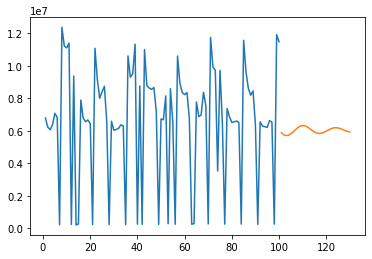

In [113]:

plt.plot(day_new,scaler.inverse_transform(df2[811:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

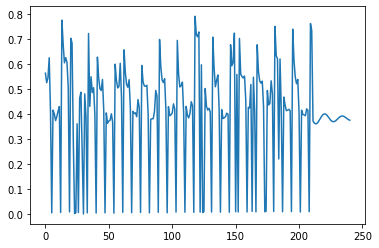

In [119]:
df3 = df2.tolist()
df3.extend(lst_output)
#plt.plot(df3[700:])

In [120]:
len(df3)

941

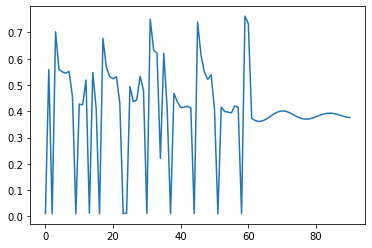

In [123]:
plt.plot(df3[850:])

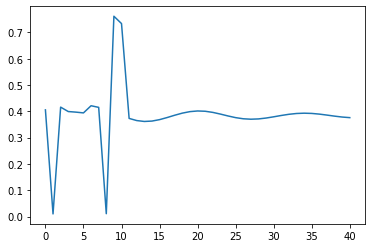

In [124]:
plt.plot(df3[900:])